In [1]:
import keras.layers as l
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn
import keras
import pickle
import numpy as np
from tensorflow import convert_to_tensor

In [2]:
boardInput = l.Input(shape = (16, 16, 1, ), name = 'boardInput')
statsInput = l.Input(shape = (2, ), name = 'statsInput')

boardConv1 = l.Conv2D(8, kernel_size = 5, padding = 'same', activation = 'relu', name = 'boardConv1')(boardInput)
boardConv2 = l.Conv2D(8, kernel_size = 5, padding = 'same', activation = 'relu', name = 'boardConv2')(boardConv1)
boardConv3 = l.Conv2D(8, kernel_size = 5, padding = 'same', activation = 'relu', name = 'boardConv3')(boardConv2)
boardPool1 = l.MaxPooling2D(2, name = 'boardPool1')(boardConv3)
boardConv4 = l.Conv2D(16, kernel_size = 5, padding = 'same', activation = 'relu', name = 'boardConv4')(boardPool1)
boardConv5 = l.Conv2D(16, kernel_size = 5, padding = 'same', activation = 'relu', name = 'boardConv5')(boardConv4)
boardConv6 = l.Conv2D(16, kernel_size = 5, padding = 'same', activation = 'relu', name = 'boardConv6')(boardConv5)
boardPool2 = l.MaxPooling2D(2, name = 'boardPool2')(boardConv6)
boardFlatten = l.Flatten(name = 'boardFlatten')(boardPool2)
boardDense1 = l.Dense(96, activation = 'relu', name = 'boardDense1')(boardFlatten)
boardDense2 = l.Dense(32, activation ='relu', name = 'boardDense2')(boardDense1)

combined = l.Concatenate()([boardDense2, statsInput])
cNormalize = l.BatchNormalization()(combined)
cDense1 = l.Dense(9, activation = 'relu', name = 'cDense1')(cNormalize)
cDense2 = l.Dense(4, activation = 'relu', name = 'cDense2')(cDense1)

output = l.Dense(1, activation = 'relu', name = 'output')(cDense2)

cnn_b2b = keras.Model(inputs = [boardInput, statsInput], outputs = output, name = 'cnn_b2b')
cnn_b2b.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['mean_absolute_error'])
cnn_b2b.summary()

Model: "cnn_b2b"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ boardInput          │ (None, 16, 16, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardConv1 (Conv2D) │ (None, 16, 16, 8) │        208 │ boardInput[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardConv2 (Conv2D) │ (None, 16, 16, 8) │      1,608 │ boardConv1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardConv3 (Conv2D) │ (None, 16, 16, 8) │      1,608 │ boardConv2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardPool1          │ (None, 8, 8, 8)   │          0 │ boardConv3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardConv4 (Conv2D) │ (None, 8, 8, 16)  │      3,216 │ boardPool1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardConv5 (Conv2D) │ (None, 8, 8, 16)  │      6,416 │ boardConv4[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardConv6 (Conv2D) │ (None, 8, 8, 16)  │      6,416 │ boardConv5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardPool2          │ (None, 4, 4, 16)  │          0 │ boardConv6[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardFlatten        │ (None, 256)       │          0 │ boardPool2[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardDense1 (Dense) │ (None, 96)        │     24,672 │ boardFlatten[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ boardDense2 (Dense) │ (None, 32)        │      3,104 │ boardDense1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ statsInput          │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 34)        │          0 │ boardDense2[0][0… │
│ (Concatenate)       │                   │            │ statsInput[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 34)        │        136 │ concatenate[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cDense1 (Dense)     │ (None, 9)         │        315 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cDense2 (Dense)     │ (None, 4)         │         40 │ cDense1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │          5 │ cDense2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 47,744 (186.50 KB)

 Trainable params: 47,676 (186.23 KB)

 Non-trainable params: 68 (272.00 B)

In [3]:
with open("data/x_train.pkl", 'rb') as f:
    x_train = pickle.load(f)
with open("data/x_val.pkl", 'rb') as f:
    x_val = pickle.load(f)
with open("data/y_train.pkl", 'rb') as f:
    y_train = pickle.load(f)
with open("data/y_val.pkl", 'rb') as f:
    y_val = pickle.load(f)
with open("data/x_test.pkl", 'rb') as f:
    x_test = pickle.load(f)
with open("data/y_test.pkl", 'rb') as f:
    y_test = pickle.load(f)

x_train_board = np.array([convert_to_tensor(i) for i in x_train.iloc[:, 0]])
x_train_data = x_train.iloc[:, 1:]

x_val_board = np.array([convert_to_tensor(i) for i in x_val.iloc[:, 0]])
x_val_data = x_val.iloc[:, 1:]

x_test_board = np.array([convert_to_tensor(i) for i in x_test.iloc[:, 0]])
x_test_data = x_test.iloc[:, 1:]

In [4]:
#out = cnn_b2b.fit((x_train_board, x_train_data), y_train, validation_data = ((x_val_board, x_val_data), y_val), batch_size = 16, epochs = 80, callbacks = [
#        keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
#])
cnn_b2b.load_weights('best_model.keras')

Epoch 1/80
286/286 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 6425.2227 - mean_absolute_error: 68.1645 - val_loss: 6244.4478 - val_mean_absolute_error: 68.4550
Epoch 2/80
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6703.5659 - mean_absolute_error: 69.0458 - val_loss: 6173.4521 - val_mean_absolute_error: 67.9082
Epoch 3/80
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6872.5918 - mean_absolute_error: 68.6460 - val_loss: 6056.1387 - val_mean_absolute_error: 67.0059
Epoch 4/80
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6682.0288 - mean_absolute_error: 67.5114 - val_loss: 5760.6509 - val_mean_absolute_error: 64.6958
Epoch 5/80
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6202.4658 - mean_absolute_error: 64.7711 - val_loss: 5503.4893 - val_mean_absolute_error: 62.5979
Epoch 6/80
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5785.7808 - mean_absolute_error: 62.2069 - val_loss: 4946.6602 - val_mean_absolute_error: 57.7347
Epoch 7/80
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

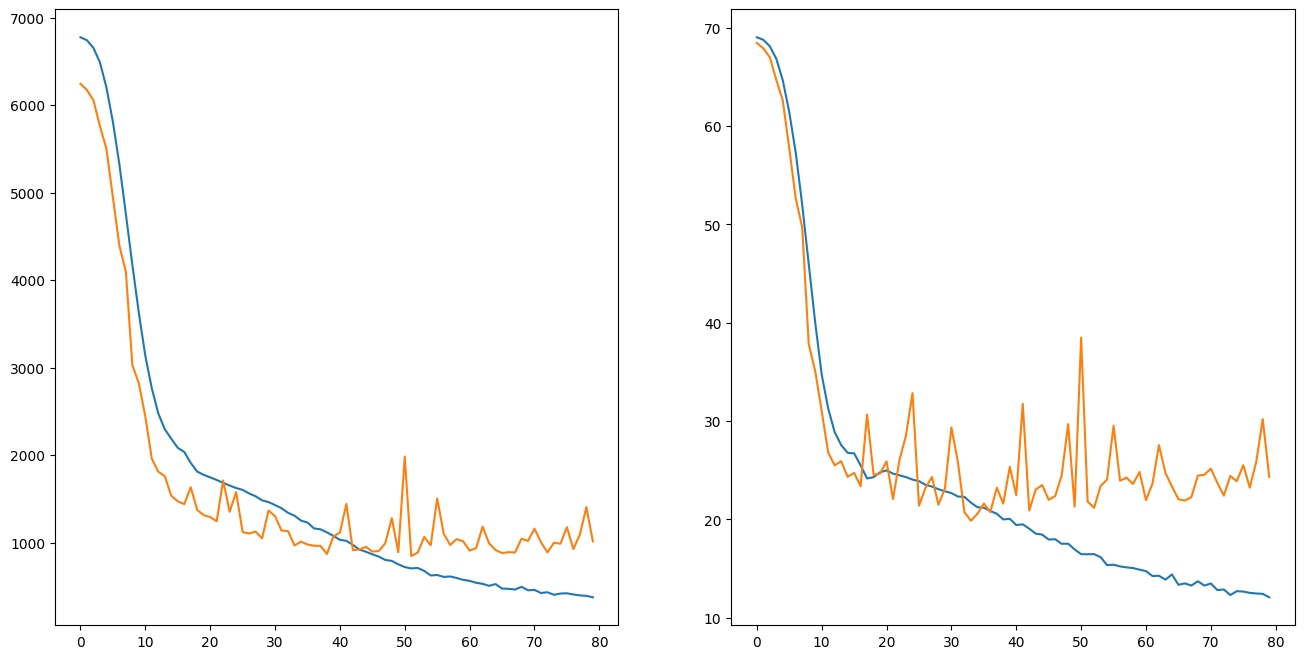

In [8]:
pt.figure(figsize = (16, 8))
h = out.history
pt.subplot(1, 2, 1)
pt.plot(h['loss'])
pt.plot(h['val_loss'])

pt.subplot(1, 2, 2)
pt.plot(h['mean_absolute_error'])
pt.plot(h['val_mean_absolute_error'])

In [9]:
cnn_b2b.evaluate((x_test_board, x_test_data), y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 957.5409 - mean_absolute_error: 21.9611


[949.5164184570312, 22.490318298339844]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


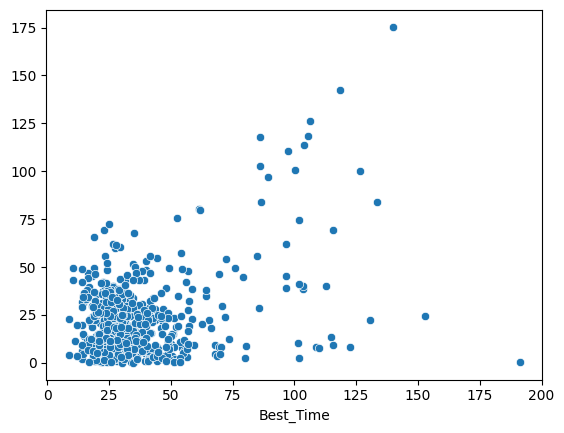

In [10]:
y_pred = cnn_b2b.predict((x_test_board, x_test_data))
sn.scatterplot(y = [abs(p - t) for p, t in zip([i[0] for i in y_pred], list(y_test))], x = x_test_data['Best_Time'])
pt.show()
